# https://seaborn.pydata.org/

Seaborn no solo es una libreria de visualización (basada en matplotlib), sino una
interfaz para proveer información estadística

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = '../data/ClimaLab_2023-10-27_2025-04-30.parquet'
tmx = pd.read_parquet(f)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79036 entries, 2023-10-27 16:40:00 to 2025-04-30 00:00:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dhi             39186 non-null  float64
 1   dni             39043 non-null  float64
 2   ghi             39104 non-null  float64
 3   p_atm           79036 non-null  float64
 4   rain_acc        79036 non-null  float64
 5   rh              79036 non-null  float64
 6   solar_altitude  79036 non-null  float64
 7   tdb             79036 non-null  float64
 8   uv              79036 non-null  float64
 9   wd              79036 non-null  float64
 10  ws              79036 non-null  float64
dtypes: float64(11)
memory usage: 7.2 MB


In [3]:

# Asegúrate de tener un DatetimeIndex llamado 'date'
df = tmx.reset_index()  # 'date' pasa a columna

# De wide a long (tidy)
tidy = df.melt(
    id_vars="date",
    var_name="variable",
    value_name="valor"
)

# Columnas de conveniencia
tidy["mes"]   = tidy["date"].dt.month
tidy["hora"]  = tidy["date"].dt.hour
tidy["anio"]  = tidy["date"].dt.year
tidy["dia_noche"] = (tmx["solar_altitude"].reindex(tidy.set_index("date").index) > 0).to_numpy()
tidy["dia_noche"] = tidy["dia_noche"].map({True:"Día", False:"Noche"})
tidy

date variable     valor  mes  hora  anio dia_noche
0      2023-10-27 16:40:00      dhi       NaN   10    16  2023       Día
1      2023-10-27 16:50:00      dhi       NaN   10    16  2023       Día
2      2023-10-27 17:00:00      dhi  1360.000   10    17  2023       Día
3      2023-10-27 17:10:00      dhi    74.140   10    17  2023       Día
4      2023-10-27 17:20:00      dhi    67.620   10    17  2023       Día
...                    ...      ...       ...  ...   ...   ...       ...
869391 2025-04-29 23:20:00       ws     0.808    4    23  2025     Noche
869392 2025-04-29 23:30:00       ws     0.518    4    23  2025     Noche
869393 2025-04-29 23:40:00       ws     1.358    4    23  2025     Noche
869394 2025-04-29 23:50:00       ws     0.625    4    23  2025     Noche
869395 2025-04-30 00:00:00       ws     1.479    4     0  2025     Noche

[869396 rows x 7 columns]

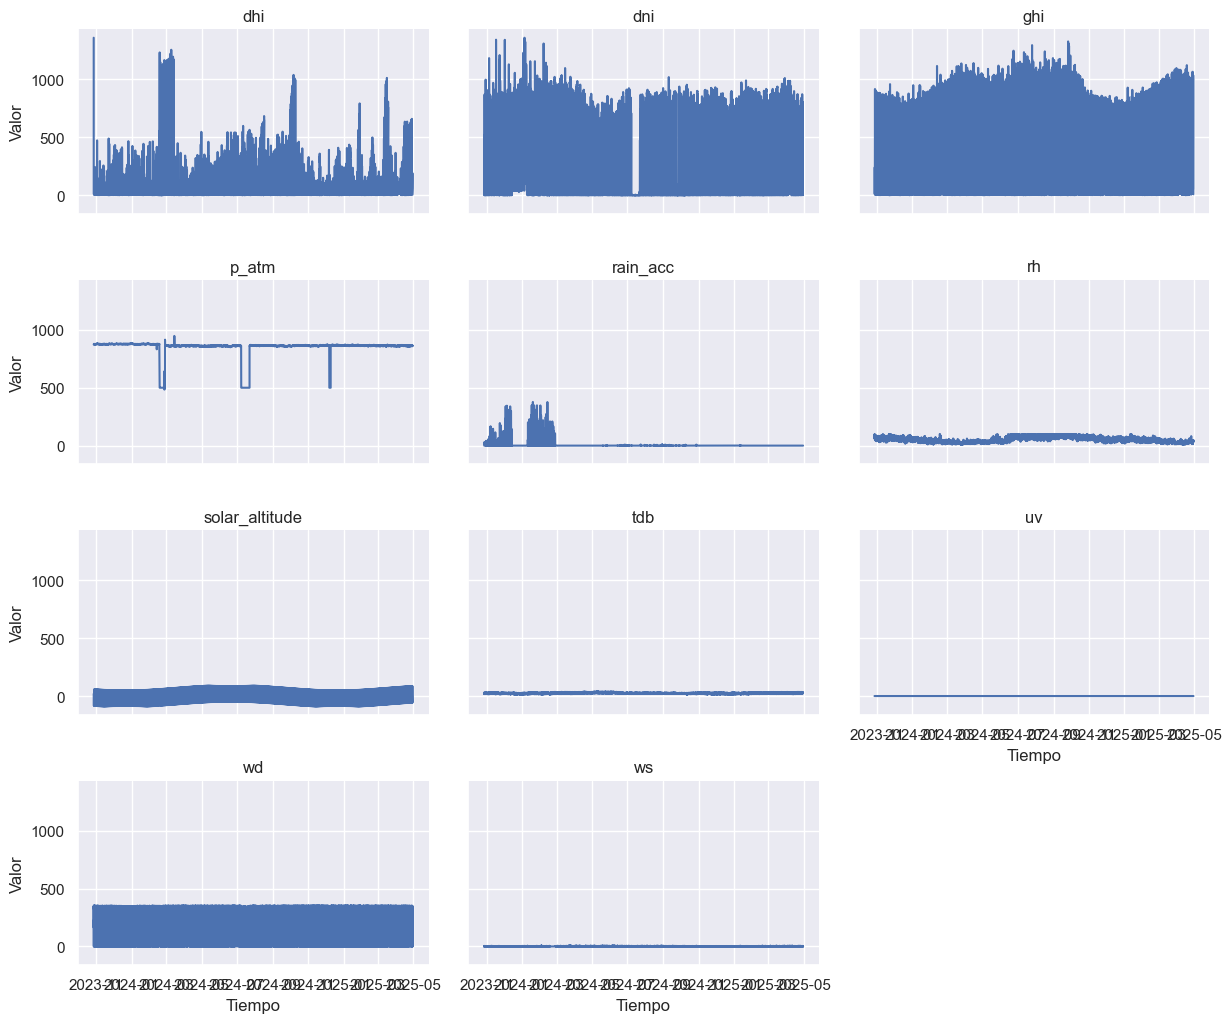

In [4]:
sns.set_theme()

g = sns.relplot(
    data=tidy,
    x="date", y="valor",
    col="variable", col_wrap=3, kind="line",
    height=2.6, aspect=1.6
)
g.set_axis_labels("Tiempo", "Valor")
g.set_titles("{col_name}")
g.tight_layout()


Text(47.25, 0.5, 'Hora del día')

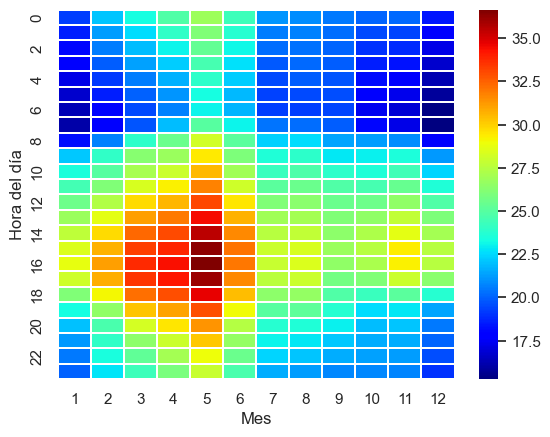

In [5]:

# Elegir variable a analizar
var = "tdb"  # o "ghi", "ws", etc.

# Agrega por hora y mes (promedio)
hm = (tidy[tidy["variable"]==var]
      .groupby(["hora","mes"], sort=True)["valor"]
      .mean()
      .unstack("mes"))


ax = sns.heatmap(hm, cmap="jet", linewidths=0.3, linecolor="white")
ax.set_xlabel("Mes")
ax.set_ylabel("Hora del día")


## Es importante conocer matplotlib ...

Para darle formato

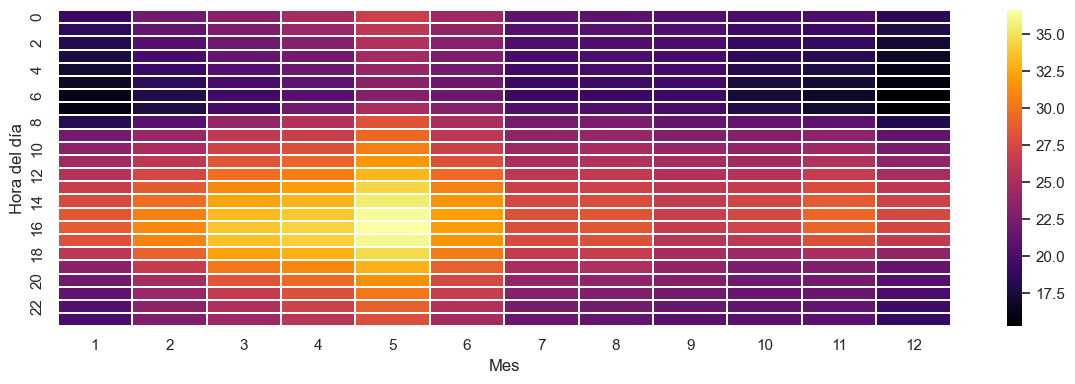

In [6]:

var = "tdb"  # o "ghi", "ws", etc.

hm = (tidy[tidy["variable"]==var]
      .groupby(["hora","mes"], sort=True)["valor"]
      .mean()
      .unstack("mes"))

fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(hm, ax=ax, cmap="inferno", linewidths=0.3, linecolor="white")
ax.set_xlabel("Mes")
ax.set_ylabel("Hora del día")
fig.tight_layout()
plt.show()


# Relaciones entre variables

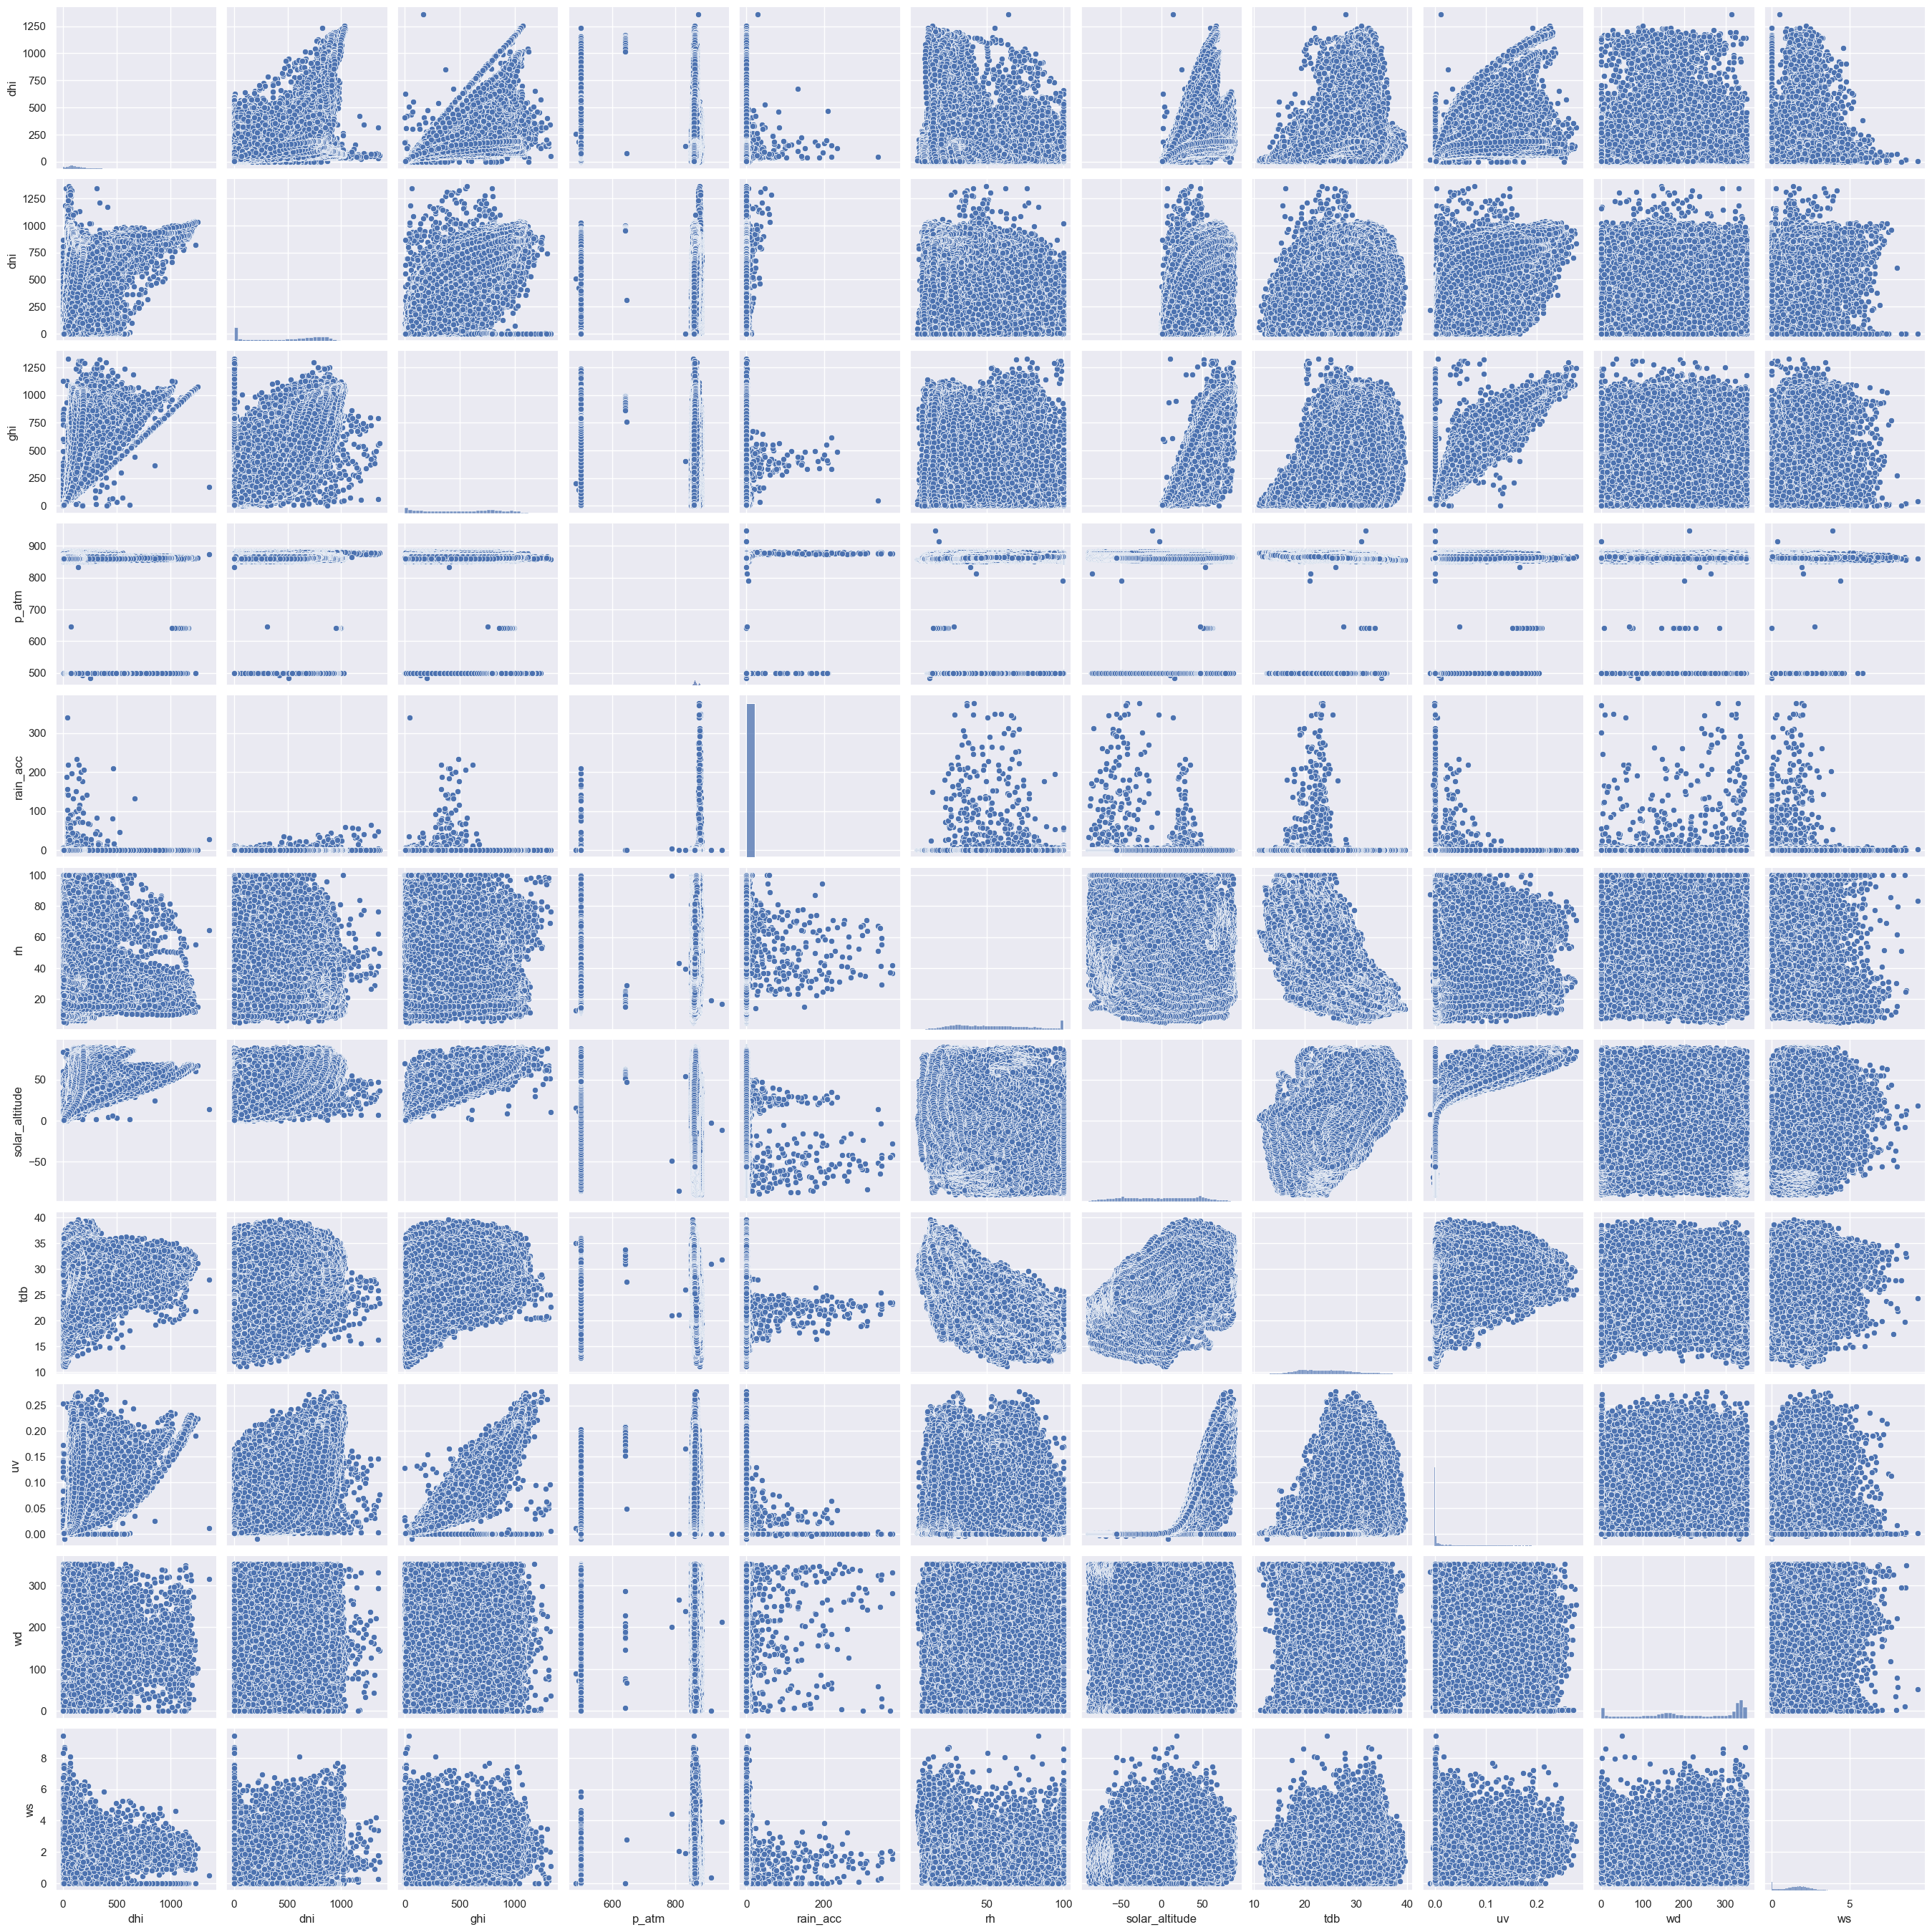

In [9]:
sns.pairplot(tmx)

Text(0, 0.5, 'tdb [°C]')

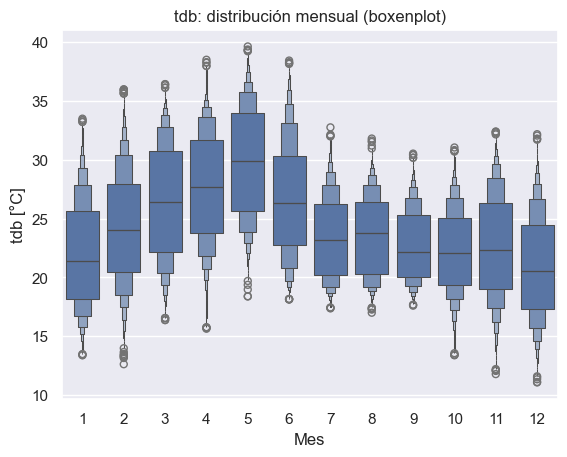

In [11]:
# Ejemplo con temperatura de bulbo seco
base = tidy[(tidy["variable"]=="tdb") ]

ax = sns.boxenplot(
    data=base,
    x="mes", y="valor"
)
ax.set_title("tdb: distribución mensual (boxenplot)")
ax.set_xlabel("Mes")
ax.set_ylabel("tdb [°C]")


Text(0, 0.5, 'tdb [°C]')

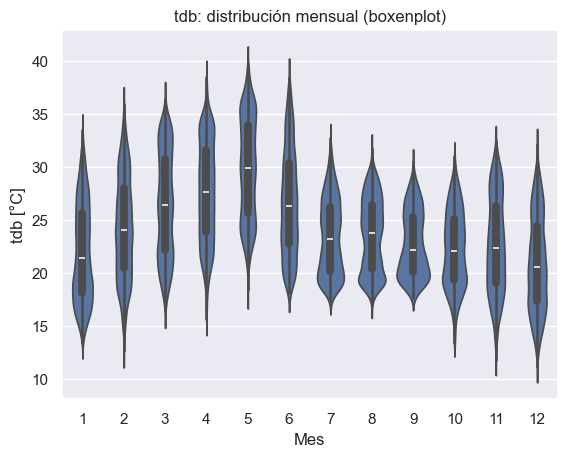

In [12]:
# Ejemplo con temperatura de bulbo seco
base = tidy[(tidy["variable"]=="tdb") ]

ax = sns.violinplot(
    data=base,
    x="mes", y="valor"
)
ax.set_title("tdb: distribución mensual (boxenplot)")
ax.set_xlabel("Mes")
ax.set_ylabel("tdb [°C]")
